# Introduction to Pandas

Forked from [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

http://pandas.pydata.org/pandas-docs/stable/10min.html#object-creation

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df1 = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df1

,A,B,C,D
2013-01-01,-0.309230,-0.009630,0.800587,-1.620724
2013-01-02,-0.342870,-0.216748,-0.563815,0.490840
2013-01-03,-1.448707,1.265333,1.657384,-0.123643
2013-01-04,0.179989,1.246638,-1.126263,-1.849379
2013-01-05,0.988951,0.320381,-0.388259,1.202412
2013-01-06,-1.821487,-0.849570,-1.330042,1.709773


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

```
In [13]: df2.<TAB>
df2.A                  df2.boxplot
df2.abs                df2.C
df2.add                df2.clip
df2.add_prefix         df2.clip_lower
df2.add_suffix         df2.clip_upper
df2.align              df2.columns
df2.all                df2.combine
df2.any                df2.combineAdd
df2.append             df2.combine_first
df2.apply              df2.combineMult
df2.applymap           df2.compound
df2.as_blocks          df2.consolidate
df2.asfreq             df2.convert_objects
df2.as_matrix          df2.copy
df2.astype             df2.corr
df2.at                 df2.corrwith
df2.at_time            df2.count
df2.axes               df2.cov
df2.B                  df2.cummax
df2.between_time       df2.cummin
df2.bfill              df2.cumprod
df2.blocks             df2.cumsum
df2.bool               df2.D
```

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

### Reading a CSV or similar data file

In [7]:
!head ../../../Desktop/mlnn-cody-hounanian/data/stockholm.csv

date,C,F
1800-01-01,-6.1,21.02
1800-01-02,-15.4,4.280000000000001
1800-01-03,-15.0,5.0
1800-01-04,-19.3,-2.740000000000002
1800-01-05,-16.8,1.759999999999998
1800-01-06,-11.4,11.479999999999997
1800-01-07,-7.6,18.32
1800-01-08,-7.1,19.22
1800-01-09,-10.1,13.82


In [8]:
df = pd.read_csv('../../../Desktop/mlnn-cody-hounanian/data/stockholm.csv', index_col='date', parse_dates=True)

In [9]:
df.head()

,C,F
date,,
1800-01-01,-6.1,21.02
1800-01-02,-15.4,4.28
1800-01-03,-15.0,5.00
1800-01-04,-19.3,-2.74
1800-01-05,-16.8,1.76


## Viewing Data

http://pandas.pydata.org/pandas-docs/stable/10min.html#viewing-data

In [32]:
df.head()

,C,F
date,,
1800-01-01,-6.1,21.02
1800-01-02,-15.4,4.28
1800-01-03,-15.0,5.00
1800-01-04,-19.3,-2.74
1800-01-05,-16.8,1.76


In [33]:
df.tail(3)

,C,F
date,,
2011-12-29,4.9,40.82
2011-12-30,0.6,33.08
2011-12-31,-2.6,27.32


In [34]:
df.index

DatetimeIndex(['1800-01-01', '1800-01-02', '1800-01-03', '1800-01-04',
               '1800-01-05', '1800-01-06', '1800-01-07', '1800-01-08',
               '1800-01-09', '1800-01-10',
               ...
               '2011-12-22', '2011-12-23', '2011-12-24', '2011-12-25',
               '2011-12-26', '2011-12-27', '2011-12-28', '2011-12-29',
               '2011-12-30', '2011-12-31'],
              dtype='datetime64[ns]', name='date', length=77431, freq=None)

In [35]:
df.columns

Index(['C', 'F'], dtype='object')

In [36]:
df.values

array([[ -6.1 ,  21.02],
       [-15.4 ,   4.28],
       [-15.  ,   5.  ],
       ...,
       [  4.9 ,  40.82],
       [  0.6 ,  33.08],
       [ -2.6 ,  27.32]])

In [38]:
df.describe()

,C,F
count,77431.000000,77431.000000
mean,6.197110,43.154797
std,8.282325,14.908185
min,-25.800000,-14.440000
25%,0.200000,32.360000
50%,5.700000,42.260000
75%,13.200000,55.760000
max,28.300000,82.940000


Transposing your data

In [39]:
df.T

date,1800-01-01,1800-01-02,1800-01-03,1800-01-04,1800-01-05,1800-01-06,1800-01-07,1800-01-08,1800-01-09,1800-01-10,...,2011-12-22,2011-12-23,2011-12-24,2011-12-25,2011-12-26,2011-12-27,2011-12-28,2011-12-29,2011-12-30,2011-12-31
C,-6.10,-15.40,-15.0,-19.30,-16.80,-11.40,-7.60,-7.10,-10.10,-9.5,...,-0.40,3.70,3.20,4.20,8.20,8.30,2.60,4.90,0.60,-2.60
F,21.02,4.28,5.0,-2.74,1.76,11.48,18.32,19.22,13.82,14.9,...,31.28,38.66,37.76,39.56,46.76,46.94,36.68,40.82,33.08,27.32


Sorting by an axis

In [41]:
df.sort_index( ascending=False).head()

,C,F
date,,
2011-12-31,-2.6,27.32
2011-12-30,0.6,33.08
2011-12-29,4.9,40.82
2011-12-28,2.6,36.68
2011-12-27,8.3,46.94


Sorting by values

In [42]:
df.sort_values(by='C').head(10)

,C,F
date,,
1814-01-20,-25.8,-14.44
1814-01-19,-25.2,-13.36
1805-02-07,-24.9,-12.82
1809-01-27,-24.8,-12.64
1802-01-12,-24.8,-12.64
1875-01-24,-24.3,-11.74
1809-02-06,-24.2,-11.56
1875-01-23,-24.1,-11.38
1987-01-10,-23.9,-11.02


In [43]:
df.sort_values(by='C', ascending=False).head(10)

,C,F
date,,
1975-08-07,28.3,82.94
1983-07-11,27.6,81.68
1994-07-28,27.2,80.96
1811-07-03,27.1,80.78
1975-08-06,27.1,80.78
1975-08-08,27.0,80.60
1945-07-17,26.8,80.24
1947-06-30,26.7,80.06
2010-07-13,26.7,80.06


## Selection

http://pandas.pydata.org/pandas-docs/stable/10min.html#selection

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

#### Getting
Selecting a single column, which yields a `Series`, equivalent to `df.A`

In [44]:
df['C']

date
1800-01-01    -6.1
1800-01-02   -15.4
1800-01-03   -15.0
1800-01-04   -19.3
1800-01-05   -16.8
              ... 
2011-12-27     8.3
2011-12-28     2.6
2011-12-29     4.9
2011-12-30     0.6
2011-12-31    -2.6
Name: C, Length: 77431, dtype: float64

In [45]:
df[0:3]

,C,F
date,,
1800-01-01,-6.1,21.02
1800-01-02,-15.4,4.28
1800-01-03,-15.0,5.00


In [48]:
df['1913-01-02':'1913-01-04']

,C,F
date,,
1913-01-02,2.3,36.14
1913-01-03,-1.7,28.94
1913-01-04,1.0,33.80


#### Selection by Label

For getting a cross section using a label

SKIPPING FOR NOW. http://pandas.pydata.org/pandas-docs/stable/10min.html#selection-by-label

#### Selection by Position

Select via the position of the passed integers

In [49]:
df.iloc[3]

C   -19.30
F    -2.74
Name: 1800-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python



In [50]:
df.iloc[3:5,0:2]

,C,F
date,,
1800-01-04,-19.3,-2.74
1800-01-05,-16.8,1.76


By lists of integer position locations, similar to the numpy/python style

In [51]:
df.iloc[[1,2,5],[0,1]]

,C,F
date,,
1800-01-02,-15.4,4.28
1800-01-03,-15.0,5.00
1800-01-06,-11.4,11.48


For slicing rows explicitly

In [52]:
df.iloc[1:3,:]

,C,F
date,,
1800-01-02,-15.4,4.28
1800-01-03,-15.0,5.00


For slicing columns explicitly

In [53]:
df.iloc[:,1:3].head()

,F
date,
1800-01-01,21.02
1800-01-02,4.28
1800-01-03,5.00
1800-01-04,-2.74
1800-01-05,1.76


For getting a value explicitly

In [54]:
df.iloc[1,1]

4.280000000000001

For getting fast access to a scalar (equiv to the prior method)

In [42]:
df.iat[1,1]

4.2800000000000011

#### Boolean Indexing

Using a single column’s values to select data.

In [44]:
df[df.C > 0].head(10)

,C,F
date,,
1800-01-27,2.2,35.96
1800-01-29,1.5,34.70
1800-01-30,0.5,32.90
1800-01-31,1.5,34.70
1800-02-01,1.5,34.70
1800-02-02,0.5,32.90
1800-03-23,0.2,32.36
1800-03-24,1.3,34.34
1800-03-25,0.9,33.62


A `where` operation for getting.

In [45]:
df > 0

,C,F
date,,
1800-01-01,False,True
1800-01-02,False,True
1800-01-03,False,True
1800-01-04,False,False
1800-01-05,False,True
1800-01-06,False,True
1800-01-07,False,True
1800-01-08,False,True
1800-01-09,False,True


In [55]:
df[df > 0]

,C,F
date,,
1800-01-01,NaN,21.02
1800-01-02,NaN,4.28
1800-01-03,NaN,5.00
1800-01-04,NaN,NaN
1800-01-05,NaN,1.76
...,...,...
2011-12-27,8.3,46.94
2011-12-28,2.6,36.68
2011-12-29,4.9,40.82


Using the `isin()` method for filtering:

In [58]:
df2 = df1.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2



,A,B,C,D,E
2013-01-01,-0.309230,-0.009630,0.800587,-1.620724,one
2013-01-02,-0.342870,-0.216748,-0.563815,0.490840,one
2013-01-03,-1.448707,1.265333,1.657384,-0.123643,two
2013-01-04,0.179989,1.246638,-1.126263,-1.849379,three
2013-01-05,0.988951,0.320381,-0.388259,1.202412,four
2013-01-06,-1.821487,-0.849570,-1.330042,1.709773,three


In [59]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.448707,1.265333,1.657384,-0.123643,two
2013-01-05,0.988951,0.320381,-0.388259,1.202412,four


#### Setting

Setting a new column automatically aligns the data by the indexes

In [60]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [61]:
df1['F'] = s1

Setting values by label

In [62]:
df1.at[dates[0],'A'] = 0

Setting values by position

In [63]:
df1.iat[0,1] = 0

Setting by assigning with a numpy array

In [65]:
df1.loc[:,'D'] = np.array([5] * len(df1))

The result of the prior setting operations

In [36]:
df1

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.229906,5,NaN
2013-01-02,0.081862,-0.694722,0.989431,5,1
2013-01-03,0.070145,0.667772,-1.963198,5,2
2013-01-04,-0.259608,-0.756092,0.048437,5,3
2013-01-05,1.181925,1.542669,-0.249990,5,4
2013-01-06,-0.384743,-0.320193,0.010833,5,5


A `where` operation with setting.

In [61]:
df2 = df1.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,-0.309230,-0.009630,-0.800587,-1.620724
2013-01-02,-0.342870,-0.216748,-0.563815,-0.490840
2013-01-03,-1.448707,-1.265333,-1.657384,-0.123643
2013-01-04,-0.179989,-1.246638,-1.126263,-1.849379
2013-01-05,-0.988951,-0.320381,-0.388259,-1.202412
2013-01-06,-1.821487,-0.849570,-1.330042,-1.709773


## Missing Data

http://pandas.pydata.org/pandas-docs/stable/10min.html#missing-data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [62]:
df1

,A,B,C,D
2013-01-01,-0.309230,-0.009630,0.800587,-1.620724
2013-01-02,-0.342870,-0.216748,-0.563815,0.490840
2013-01-03,-1.448707,1.265333,1.657384,-0.123643
2013-01-04,0.179989,1.246638,-1.126263,-1.849379
2013-01-05,0.988951,0.320381,-0.388259,1.202412
2013-01-06,-1.821487,-0.849570,-1.330042,1.709773


In [63]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,C,F,E
2013-01-01,NaN,NaN,1.0
2013-01-02,NaN,NaN,1.0
2013-01-03,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN


To drop any rows that have missing data.



In [69]:
df1.dropna(how='any')

,C,F,E


Filling missing data

In [70]:
df1.fillna(value=5)

,C,F,E
2013-01-01,5.0,5.0,1.0
2013-01-02,5.0,5.0,1.0
2013-01-03,5.0,5.0,5.0
2013-01-04,5.0,5.0,5.0


To get the boolean mask where values are nan

In [71]:
pd.isnull(df1)

,C,F,E
2013-01-01,True,True,False
2013-01-02,True,True,False
2013-01-03,True,True,True
2013-01-04,True,True,True


## Operations

http://pandas.pydata.org/pandas-docs/stable/10min.html#operations

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [72]:
df.mean()

C     6.197110
F    43.154797
dtype: float64

Same operation on the other axis

In [64]:
df.mean(axis=1)

date
1800-01-01     7.46
1800-01-02    -5.56
1800-01-03    -5.00
1800-01-04   -11.02
1800-01-05    -7.52
              ...  
2011-12-27    27.62
2011-12-28    19.64
2011-12-29    22.86
2011-12-30    16.84
2011-12-31    12.36
Length: 77431, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [74]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [77]:
df.sub(s, axis='index').head()

,C,F
1800-01-01,NaN,NaN
1800-01-02,NaN,NaN
1800-01-03,NaN,NaN
1800-01-04,NaN,NaN
1800-01-05,NaN,NaN


### Apply

Applying functions to the data

In [65]:
df.apply(np.cumsum)

,C,F
date,,
1800-01-01,-6.1,21.02
1800-01-02,-21.5,25.30
1800-01-03,-36.5,30.30
1800-01-04,-55.8,27.56
1800-01-05,-72.6,29.32
...,...,...
2011-12-27,479842.9,3341381.22
2011-12-28,479845.5,3341417.90
2011-12-29,479850.4,3341458.72


In [66]:
df.apply(lambda x: x.max() - x.min())

C    54.10
F    97.38
dtype: float64

### Histogramming

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    3
2    5
3    0
4    5
5    4
6    4
7    4
8    1
9    2
dtype: int64

In [68]:
s.value_counts()

4    3
3    2
5    2
0    1
1    1
2    1
dtype: int64

### String Methods

In [82]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [83]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

http://pandas.pydata.org/pandas-docs/stable/10min.html#merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.676971,2.136632,2.695624,-1.162362
1,-1.653163,-1.218323,0.774628,1.846357
2,0.634318,0.027046,-0.541672,0.072673
3,0.122019,-0.284349,0.317734,-2.564656
4,1.903638,-0.510326,0.090742,-1.815691
5,1.180442,-0.310988,-0.195193,0.270853
6,-0.447245,1.818733,0.287092,0.388115
7,0.164015,0.146187,-0.456770,1.339446
8,-0.532709,-0.842233,-0.847838,-0.297172
9,0.328157,0.673468,0.732670,2.255155


In [73]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.676971  2.136632  2.695624 -1.162362
 1 -1.653163 -1.218323  0.774628  1.846357
 2  0.634318  0.027046 -0.541672  0.072673,
           0         1         2         3
 3  0.122019 -0.284349  0.317734 -2.564656
 4  1.903638 -0.510326  0.090742 -1.815691
 5  1.180442 -0.310988 -0.195193  0.270853
 6 -0.447245  1.818733  0.287092  0.388115,
           0         1         2         3
 7  0.164015  0.146187 -0.456770  1.339446
 8 -0.532709 -0.842233 -0.847838 -0.297172
 9  0.328157  0.673468  0.732670  2.255155]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,-1.676971,2.136632,2.695624,-1.162362
1,-1.653163,-1.218323,0.774628,1.846357
2,0.634318,0.027046,-0.541672,0.072673
3,0.122019,-0.284349,0.317734,-2.564656
4,1.903638,-0.510326,0.090742,-1.815691
5,1.180442,-0.310988,-0.195193,0.270853
6,-0.447245,1.818733,0.287092,0.388115
7,0.164015,0.146187,-0.456770,1.339446
8,-0.532709,-0.842233,-0.847838,-0.297172
9,0.328157,0.673468,0.732670,2.255155


### Join

SQL style merges.

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [77]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe.

In [83]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.207135,0.036402,0.396549,0.980272
1,-1.954775,1.682067,1.566860,0.508716
2,-0.639633,0.317118,-0.656666,-0.747382
3,-1.778451,-0.815190,0.248830,-0.353678
4,0.953017,-0.743029,-0.612442,0.653527
5,0.608910,-0.048283,-1.013091,0.932184
6,1.130909,0.502838,0.583895,-1.067515
7,0.389466,-0.950339,0.655455,0.424635


In [82]:
s = df.iloc[3]
s

A    1.081107
B    0.032742
C   -1.417282
D    0.392921
Name: 3, dtype: float64

In [85]:
pd.concat(s, ignore_index=True)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

## Grouping

http://pandas.pydata.org/pandas-docs/stable/10min.html#grouping

By “group by” we are referring to a process involving one or more of the following steps

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [93]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.233050,0.681996
1,bar,one,0.321171,0.007366
2,foo,two,-0.322885,-0.272182
3,bar,three,-0.771863,2.637675
4,foo,two,-3.478700,0.611528
5,bar,two,1.657373,-1.894662
6,foo,one,-0.524388,-0.160181
7,foo,three,0.126911,-1.721091


Grouping and then applying a function `sum` to the resulting groups.

In [94]:
df.groupby('A').sum()

,C,D
A,,
bar,1.206681,0.750379
foo,-4.432112,-0.859930


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [95]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.321171  0.007366
    three -0.771863  2.637675
    two    1.657373 -1.894662
foo one   -0.757438  0.521815
    three  0.126911 -1.721091
    two   -3.801585  0.339346

## Reshaping

http://pandas.pydata.org/pandas-docs/stable/10min.html#reshaping

**SKIP**

## Time Series

http://pandas.pydata.org/pandas-docs/stable/10min.html#time-series

**SKIP**

## Categoricals

http://pandas.pydata.org/pandas-docs/stable/10min.html#categoricals

**SKIP**

## Plotting

http://pandas.pydata.org/pandas-docs/stable/10min.html#plotting

<AxesSubplot:>

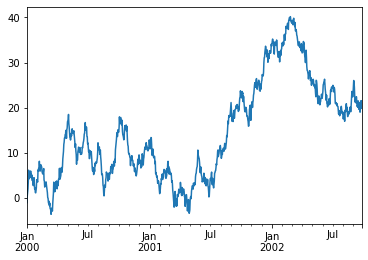

In [69]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

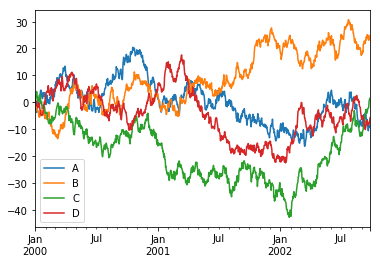

In [97]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

http://pandas.pydata.org/pandas-docs/stable/10min.html#getting-data-in-out

#### CSV

In [98]:
df.to_csv('foo.csv')

In [99]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.802341,0.483632,0.505335,0.537238
1,2000-01-02,-0.108932,-0.155813,0.652269,0.023478
2,2000-01-03,-2.539314,-0.964319,1.222420,0.528283
3,2000-01-04,-2.369205,-1.945356,3.219671,0.073337
4,2000-01-05,-3.782339,-1.114460,3.966525,-0.929582


### HDF5

**SKIP**

#### Excel

**SKIP**

## Gotchas

http://pandas.pydata.org/pandas-docs/stable/10min.html#gotchas

**SKIP**

## Further reading

- http://pandas.pydata.org/pandas-docs/stable/tutorials.html